In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import sklearn.model_selection as ms

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data Source
train_values = pd.read_csv('train_values_OL27nta.csv')
train_values.head(5)

train_labels = pd.read_csv('train_labels_DPetPH2.csv')
train_labels.head(5)

train = train_values.merge(train_labels,on='row_id')
train.head(5)
train.shape

(1562, 46)

In [3]:
test = pd.read_csv('test_values_kWyIOM9.csv')
test.isnull().mean()

row_id                                        0.000000
county_code                                   0.000000
state                                         0.000000
population                                    0.000000
renter_occupied_households                    0.000000
pct_renter_occupied                           0.000000
evictions                                     0.198604
rent_burden                                   0.000000
pct_white                                     0.000000
pct_af_am                                     0.000000
pct_hispanic                                  0.000000
pct_am_ind                                    0.000000
pct_asian                                     0.000000
pct_nh_pi                                     0.000000
pct_multiple                                  0.000000
pct_other                                     0.000000
poverty_rate                                  0.000000
rucc                                          0.000000
urban_infl

In [4]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(train, train.gross_rent, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((1249, 46), (313, 46))

In [5]:
categorical = [var for var in train.columns if train[var].dtype=='O']
print(categorical)

['county_code', 'state', 'rucc', 'urban_influence', 'economic_typology']


In [6]:
for var in categorical:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

county_code 0.0  % missing values
state 0.0  % missing values
rucc 0.0  % missing values
urban_influence 0.0  % missing values
economic_typology 0.0  % missing values


In [7]:
boolean = [var for var in train.columns if train[var].dtype=='?']
print('There are {} boolean variables'.format(len(boolean)))

There are 0 boolean variables


In [8]:
numerical_with_bool = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables. This includes boolean values'.format(len(numerical_with_bool)))

There are 41 numerical variables. This includes boolean values


In [9]:
numerical = [var for var in train[numerical_with_bool] if var not in boolean]
print('There are {} numerical variables'.format(len(numerical)))

There are 41 numerical variables


In [10]:
for var in numerical:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

row_id 0.0  % missing values
population 0.0  % missing values
renter_occupied_households 0.0  % missing values
pct_renter_occupied 0.0  % missing values
evictions 0.207  % missing values
rent_burden 0.0  % missing values
pct_white 0.0  % missing values
pct_af_am 0.0  % missing values
pct_hispanic 0.0  % missing values
pct_am_ind 0.0  % missing values
pct_asian 0.0  % missing values
pct_nh_pi 0.0  % missing values
pct_multiple 0.0  % missing values
pct_other 0.0  % missing values
poverty_rate 0.0  % missing values
pct_civilian_labor 0.0  % missing values
pct_unemployment 0.0  % missing values
pct_uninsured_adults 0.0  % missing values
pct_uninsured_children 0.0  % missing values
pct_adult_obesity 0.0  % missing values
pct_adult_smoking 0.141  % missing values
pct_diabetes 0.0  % missing values
pct_low_birthweight 0.071  % missing values
pct_excessive_drinking 0.307  % missing values
pct_physical_inactivity 0.0  % missing values
air_pollution_particulate_matter_value 0.011  % missing val

In [11]:
for var in numerical:
    if X_train[var].isnull().mean() > 0.6:
        X_train=X_train.drop(var, axis=1)
        X_test=X_test.drop(var, axis=1)
        

In [12]:
X_train.shape, X_test.shape

((1249, 45), (313, 45))

In [13]:
vars_num_removed =[var for var in train.columns if train[var].isnull().mean()> 0.6 and train[var].dtypes!='O']
print(vars_num_removed)

['homicides_per_100k']


In [14]:
numerical = [var for var in train[numerical] if var not in vars_num_removed]
print('There are {} numerical variables'.format(len(numerical)))

There are 40 numerical variables


In [15]:
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, np.round(X_train[col].isnull().mean(), 3),  ' % missing values')
    

evictions 0.207  % missing values
pct_adult_smoking 0.141  % missing values
pct_low_birthweight 0.071  % missing values
pct_excessive_drinking 0.307  % missing values
air_pollution_particulate_matter_value 0.011  % missing values
motor_vehicle_crash_deaths_per_100k 0.11  % missing values
pop_per_dentist 0.066  % missing values
pop_per_primary_care_physician 0.068  % missing values


In [16]:
# let's identify any discrete variables, if any
discrete = []
for var in numerical:
    if len(train[var].unique())<20:
        print(var, ' values: ', train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [17]:
# replace the missing values
for var in numerical:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[numerical].isnull().sum()

row_id                                        0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
evictions                                     0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
pct_civilian_labor                            0
pct_unemployment                              0
pct_uninsured_adults                          0
pct_uninsured_children                        0
pct_adult_obesity                             0
pct_adult_smoking                       

In [18]:
X_test[numerical].isnull().sum()

row_id                                        0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
evictions                                     0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
pct_civilian_labor                            0
pct_unemployment                              0
pct_uninsured_adults                          0
pct_uninsured_children                        0
pct_adult_obesity                             0
pct_adult_smoking                       

In [19]:
continuous = [var for var in numerical if var not in discrete and var not in ['row_id', 'poverty_probability']]
print(continuous)

['population', 'renter_occupied_households', 'pct_renter_occupied', 'evictions', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'motor_vehicle_crash_deaths_per_100k', 'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 'birth_rate_per_1k', 'death_rate_per_1k', 'gross_rent']


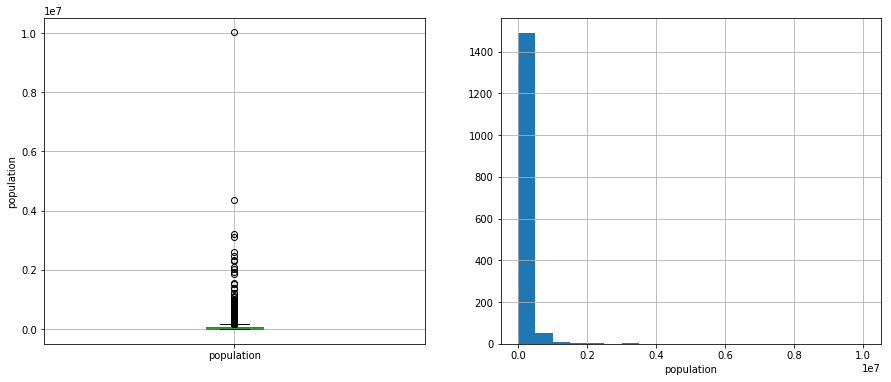

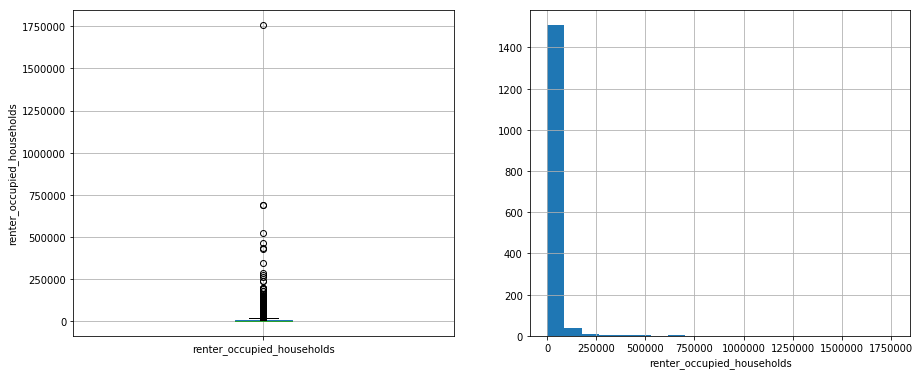

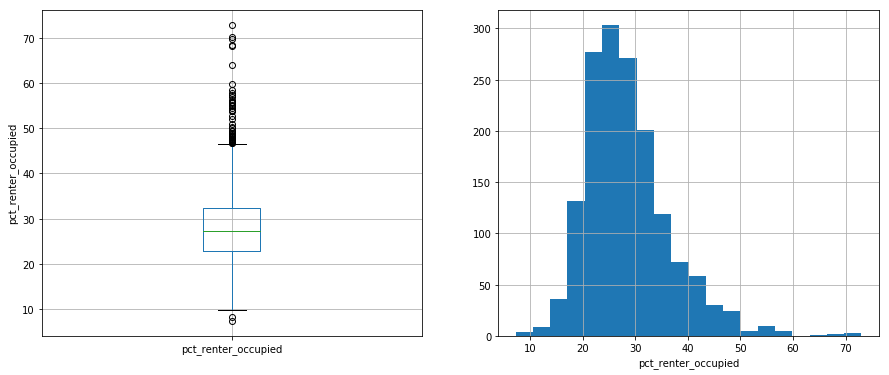

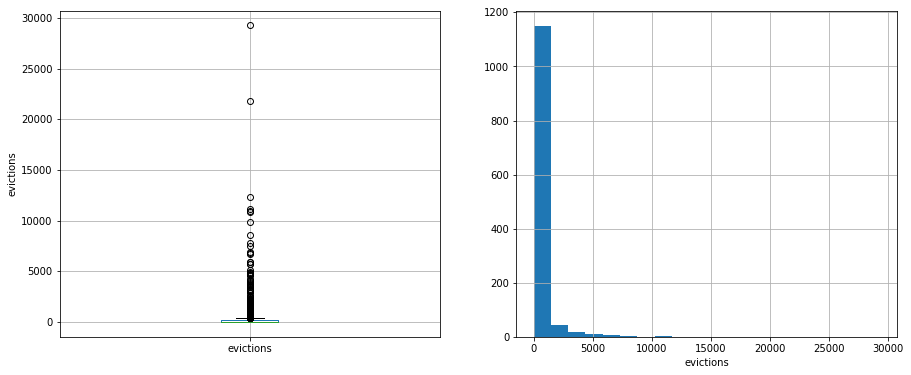

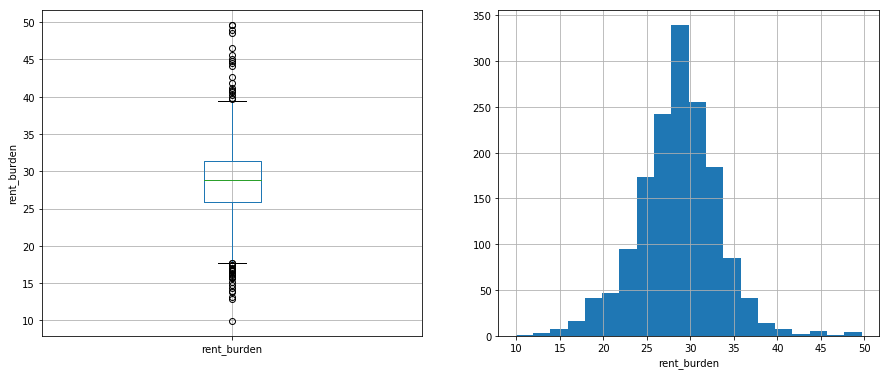

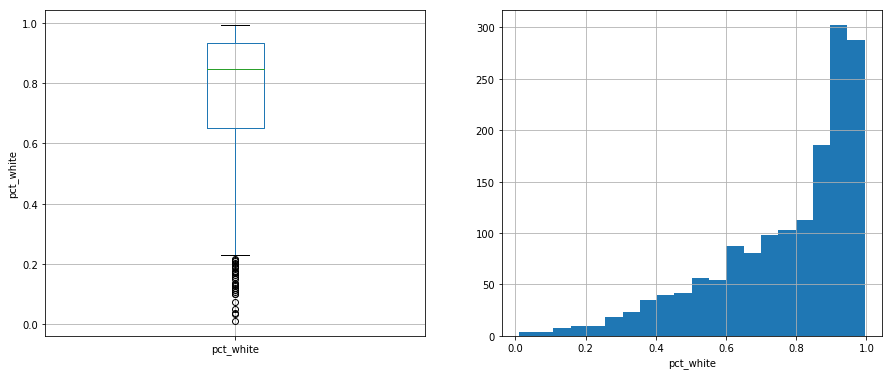

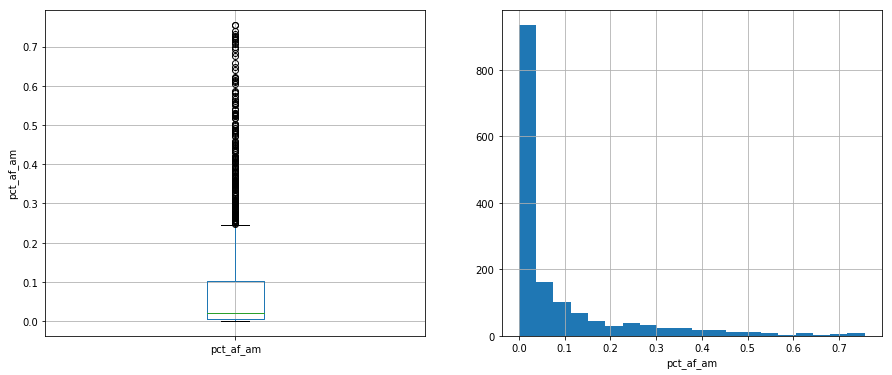

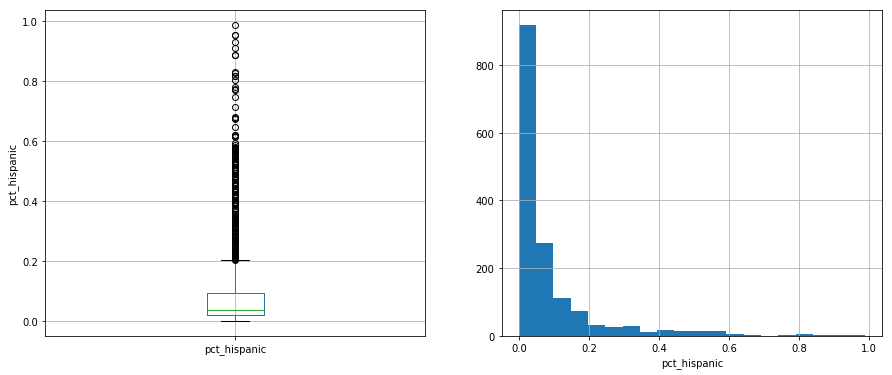

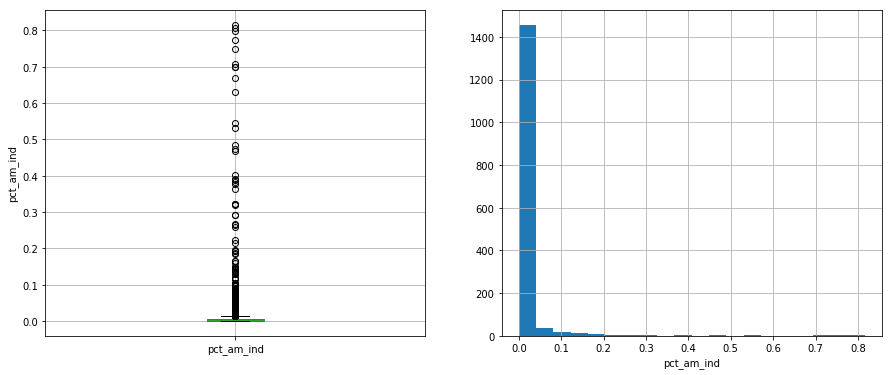

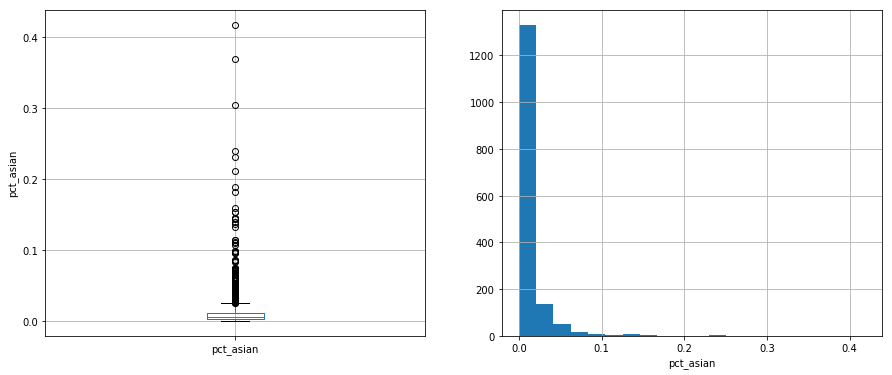

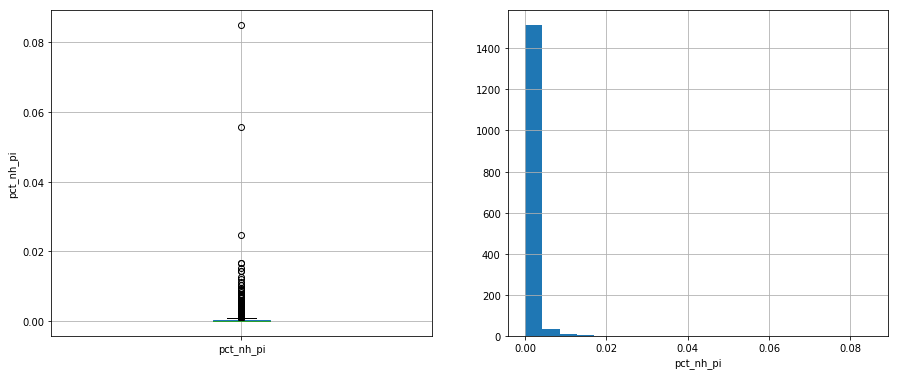

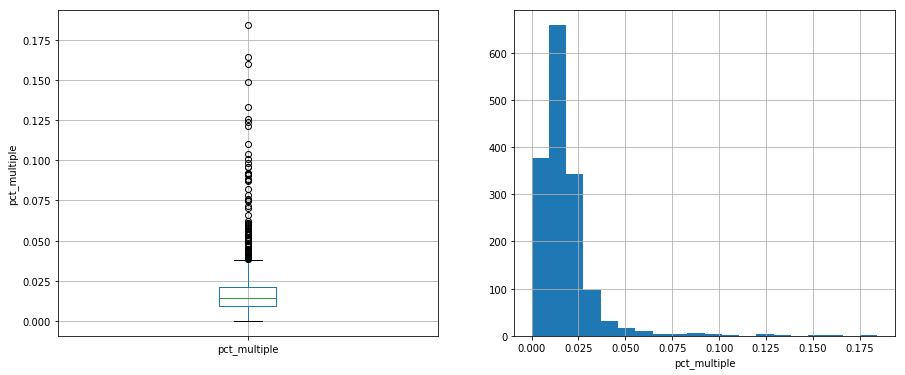

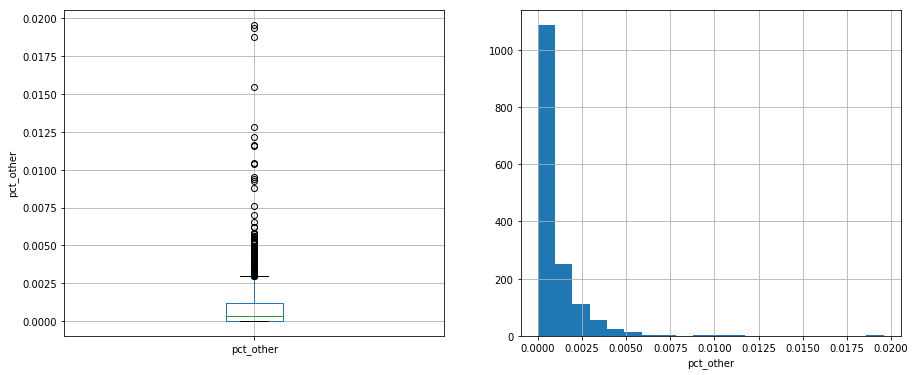

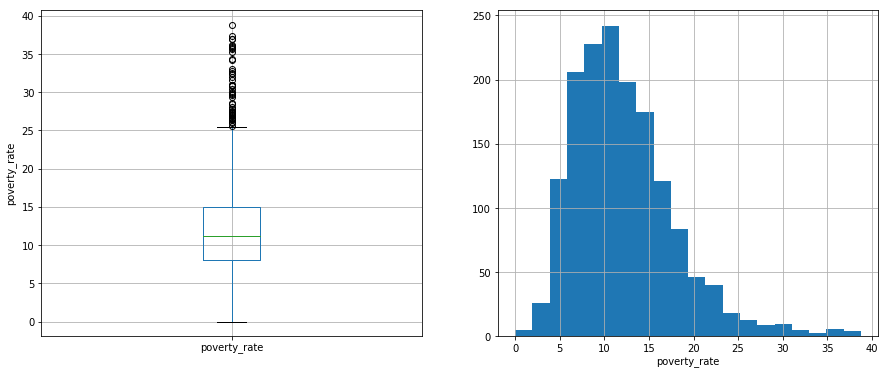

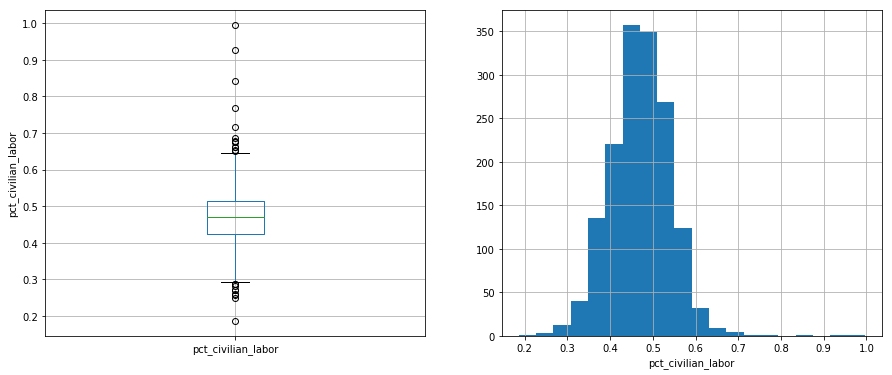

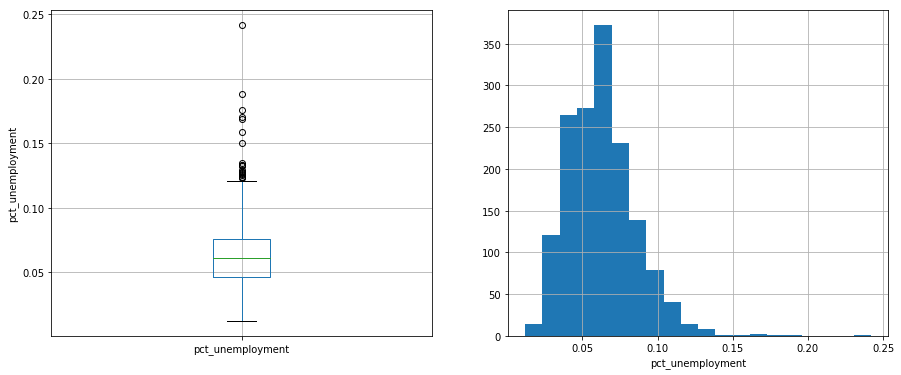

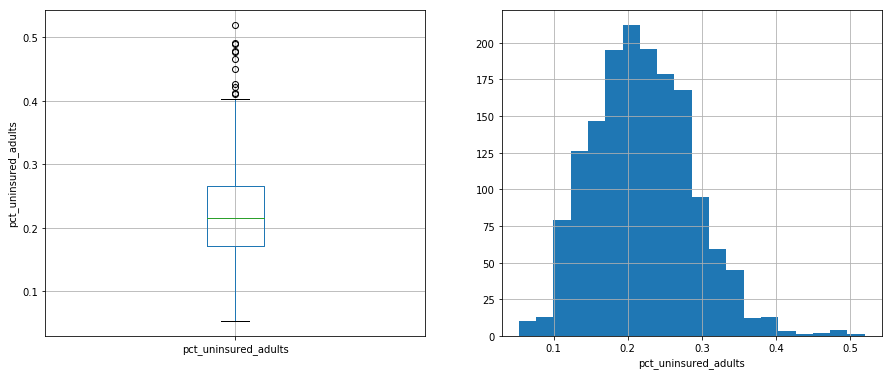

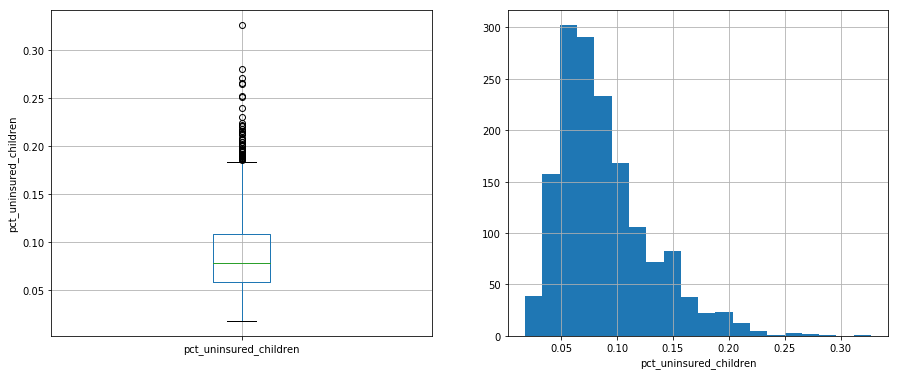

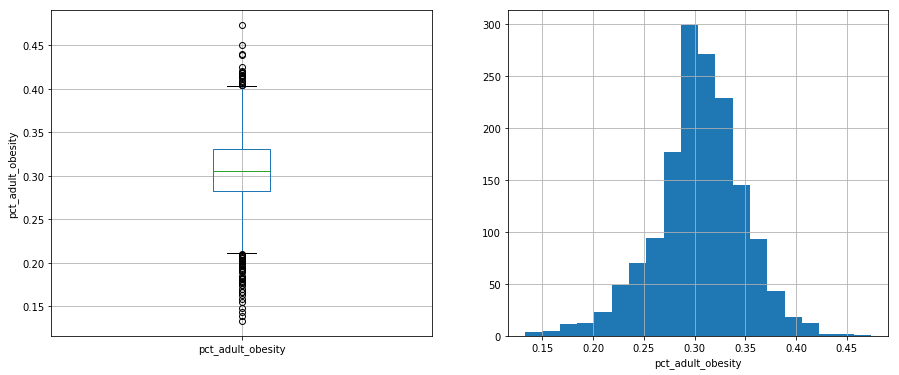

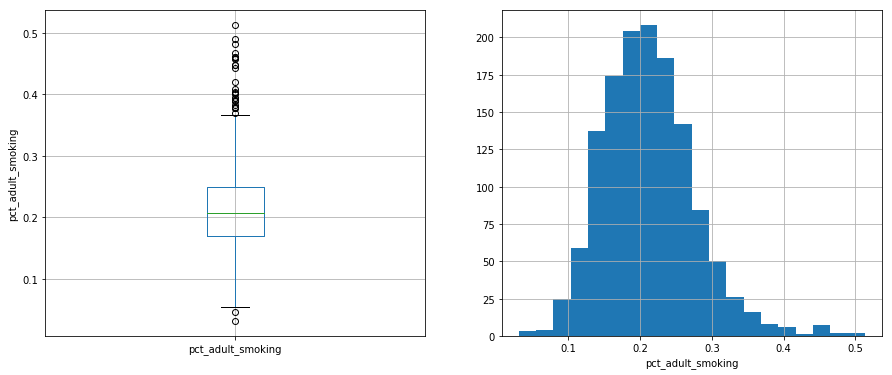

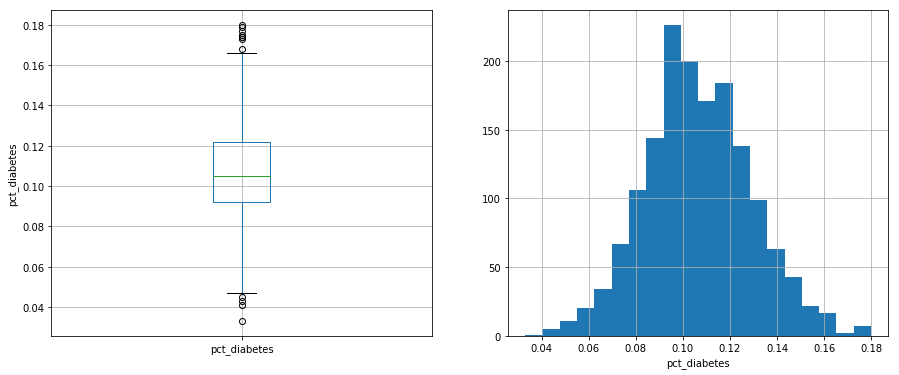

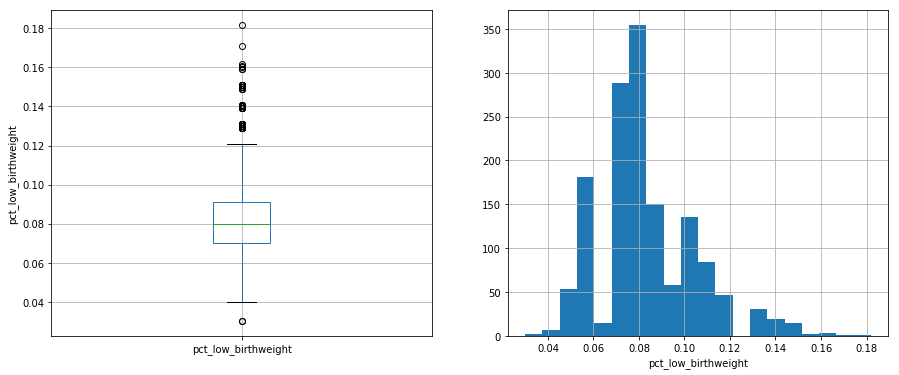

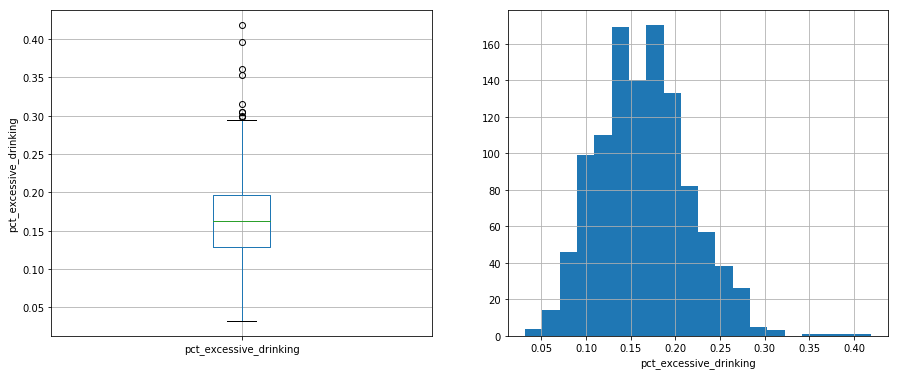

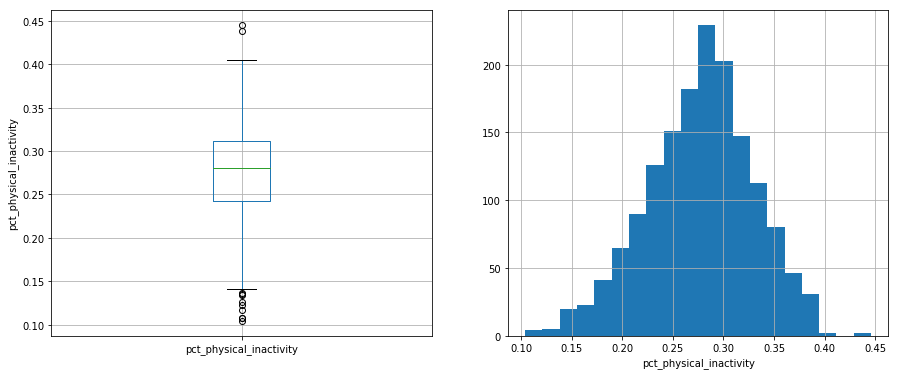

In [ ]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = train.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = train[var].hist(bins=20)
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
len(train.pct_other.unique())

In [ ]:
for var in continuous:
    if len(train[var].unique()) < 50:
        X_train[var]=np.round(X_train[var], 0)     
        X_test[var]=np.round(X_test[var], 0)

In [ ]:
continuous = [var for var in train[continuous] if var not in discrete]
print('There are {} numerical variables'.format(len(continuous)))
continuous

In [ ]:
X_train.boxplot(column= 'populati')